In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ipyfilechooser import FileChooser


%matplotlib inline

In [11]:
fc = FileChooser()
display(fc)


FileChooser(path='/home/daan/bitofpepper/ai_robot_new/ai_robot/notebooks', filename='', title='', show_hidden=…

In [12]:
#red data
data = pd.read_csv(os.path.join('..', 'simulator', 'logs', fc.selected))
data.head()

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'NoneType'

In [13]:
#look at data 
#student code


In [14]:
#get the label fro the maovement action (forward. stop, left, right)
label_movement = data.columns[0]


In [15]:
#plot a bar char of movement distribution

In [16]:
#think about distrigution effect on learning algorithm


In [17]:
#Get training data 
train1 = data.drop([label_movement],axis=1)

In [18]:
train1.head()

,255,255.1,255.2,255.3,255.4,255.5,255.6,255.7,255.8,255.9,...,255.653,255.654,255.655,255.656,255.657,255.658,255.659,255.660,255.661,255.662
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [19]:
from sklearn.svm import SVC

In [20]:
clf = SVC()

In [22]:
data = data.dropna()

data_no_stop = data[data[label_movement] != 'stop']
conv_labels = [0 if values == 'forward' else values for values in data_no_stop[label_movement] ]
conv_labels = [1 if values == 'left' else values for values in conv_labels ]
conv_labels = [2 if values == 'right' else values for values in conv_labels ]

labels = conv_labels
train1 = data_no_stop.drop([ label_movement],axis=1)
data_no_stop.describe()


,255,255.1,255.2,255.3,255.4,255.5,255.6,255.7,255.8,255.9,...,255.653,255.654,255.655,255.656,255.657,255.658,255.659,255.660,255.661,255.662
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,...,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000
mean,230.749739,230.749739,230.749739,231.450678,231.450678,231.450678,226.663883,226.663883,226.663883,225.546451,...,213.796190,208.704332,208.704332,208.704332,201.640397,201.640397,201.640397,195.937370,195.937370,195.937370
std,59.735594,59.735594,59.735594,59.674884,59.674884,59.674884,65.114495,65.114495,65.114495,66.715331,...,75.932525,79.279946,79.279946,79.279946,82.855036,82.855036,82.855036,85.376374,85.376374,85.376374
min,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
25%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,165.500000,165.500000,165.500000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
50%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
75%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(train1, conv_labels, test_size = 0.10, random_state = 2)

In [25]:
clf.fit(x_train,y_train)

SVC()

In [26]:
clf.score(x_test, y_test)

0.7447916666666666

In [27]:
#Try other machine learning algorithms

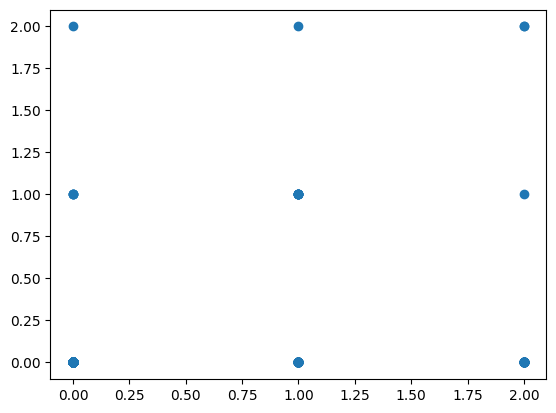

In [28]:
plt.scatter(y_test, clf.predict(x_test))

In [28]:
from sklearn import ensemble
#clf = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1)

In [29]:
#clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [29]:
#clf.score(x_test, y_test)

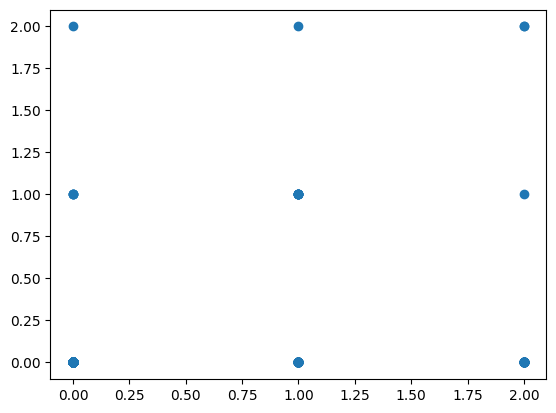

In [30]:
plt.scatter(y_test, clf.predict(x_test))

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
#try gridseaarch

In [32]:

#write the resulting model to a files that will be read by the simulator
from joblib import dump, load
dump(clf,os.path.join('..', 'models', 'auto_pilot.joblib'))

['../models/auto_pilot.joblib']